In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# creating path for data import

path = r'C:\Users\scott\Desktop\Data Analysis\CF Immersive\Python\Jan-2022 Instacart Basket Analysis'

In [5]:
# importing merged orders/products dataframe

df = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'orders_products_agg_Jan_20_2022.pkl'))

In [4]:
df_prods = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'products_checked.csv'))

<AxesSubplot:>

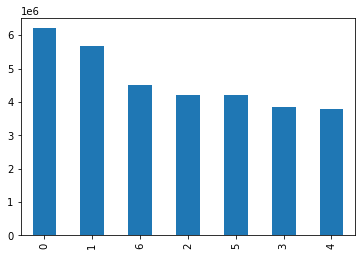

In [5]:
df['orders_day_of_week'].value_counts().plot.bar()

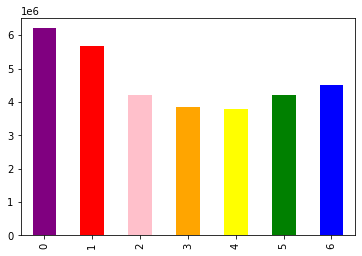

In [6]:
bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple','red','pink','orange','yellow','green','blue'])

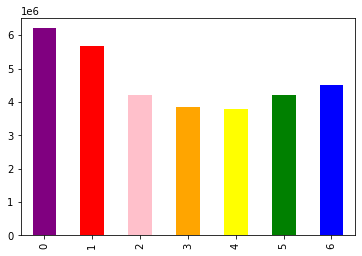

In [7]:
bar.figure

In [8]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

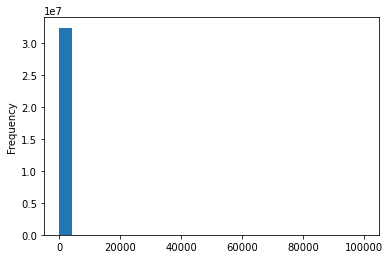

In [9]:
df['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

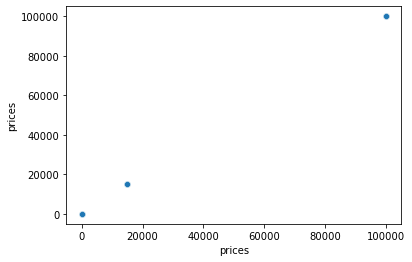

In [10]:
sns.scatterplot(x = 'prices', y = 'prices', data = df)

In [6]:
df['prices'].loc[df['prices'] > 100]

Series([], Name: prices, dtype: float64)

In [12]:
df_prods.head()

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices
0,0,1,Chocolate Sandwich Cookies,61,19,5.8
1,1,2,All-Seasons Salt,104,13,9.3
2,2,3,Robust Golden Unsweetened Oolong Tea,94,7,4.5
3,3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,10.5
4,4,5,Green Chile Anytime Sauce,5,13,4.3


In [10]:
df_prods.loc[df_prods['prices'] > 100]

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices


In [11]:
df.loc[df['prices'] > 100, 'prices'] = np.nan

In [4]:
df['prices'].max()

25.0

In [13]:
# exporting new dataframe as .pkl due to its large size

df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_agg_Jan_20_2022.pkl'))

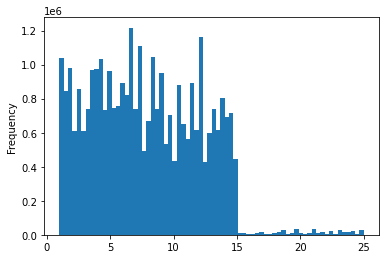

In [6]:
hist = df['prices'].plot.hist(bins = 70)

In [17]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

In [7]:
np.random.seed(4)

In [8]:
dev = np.random.rand(len(df)) <= 0.7

In [9]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [10]:
big = df[dev]

In [11]:
small = df[~dev]

In [12]:
len(big) + len(small)

32404859

In [13]:
df_2 = small[['orders_day_of_week', 'prices']]

In [16]:
df_2.head()

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,1,9.0


In [17]:
df_2['prices'].mean()

7.791260694244707

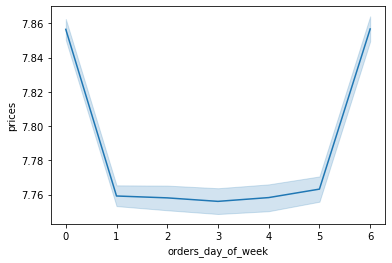

In [14]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [15]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'exists', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_days_since', 'frequency_flag'],
      dtype='object')